This is one of example to extract the data. I split the shapefile because my computation not strong enough

In [1]:
from census_mapper  import *
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
cd d:\Notebook\git\datashader

d:\Notebook\git\datashader


In [3]:
df = pd.read_csv('jml_pend_kec.csv')

In [4]:
cd d:\data\census

d:\data\census


In [35]:
aceh = gpd.read_file('aceh.shp')
aceh.shape

(176, 19)

In [36]:
df['nama_kec_s'] = df.nama_kec_s.str.title()
aceh['Kecamatan'] = aceh.Kecamatan.str.title()

aceh_join = pd.merge(aceh, df, how='left', left_on='Kecamatan', right_on='nama_kec_s')
aceh_join.shape

(193, 25)

In [38]:
values = {'jumlah_pen': aceh_join.jumlah_pen.min(), 'kepadatan_' : aceh_join.kepadatan_.min()}
aceh_join = aceh_join.fillna(value=values)

In [39]:
aceh_j = gpd.GeoSeries(aceh_join.geometry)
val_s = pd.Series(aceh_join.jumlah_pen)
val_pts = round(aceh_join.kepadatan_.mean())

random_aceh = gen_points_in_gdf_polys(geometry = aceh_j, values=val_s, points_per_value=val_pts)

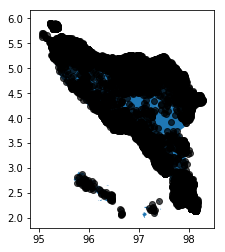

In [40]:
ax = aceh_join.plot()
random_aceh.plot(color='black', ax=ax, alpha=.7)

In [41]:
gpd.GeoDataFrame(random_aceh).to_file('aceh_point.shp')